In [39]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("data/factbook.db")

query_info_schema = "SELECT * FROM sqlite_master WHERE type='table';"
info_schema = pd.read_sql_query(query_info_schema, conn)

query_facts_5 = "SELECT * FROM facts LIMIT 5;"
facts_5 = pd.read_sql_query(query_facts_5, conn)

print("Information Schema", info_schema)
print(facts_5)

Information Schema     type             name         tbl_name  rootpage  \
0  table            facts            facts         2   
1  table  sqlite_sequence  sqlite_sequence         3   

                                                 sql  
0  CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY...  
1             CREATE TABLE sqlite_sequence(name,seq)  
   id code         name     area  area_land  area_water  population  \
0   1   af  Afghanistan   652230     652230           0    32564342   
1   2   al      Albania    28748      27398        1350     3029278   
2   3   ag      Algeria  2381741    2381741           0    39542166   
3   4   an      Andorra      468        468           0       85580   
4   5   ao       Angola  1246700    1246700           0    19625353   

   population_growth  birth_rate  death_rate  migration_rate  \
0               2.32       38.57       13.89            1.51   
1               0.30       12.92        6.58            3.30   
2               1.84       2

In [40]:
# Quick stats from the factbook

query_summary_stats = "SELECT min(population), max(population), min(population_growth), max(population_growth) FROM facts;"
summary_stats = conn.execute(query_summary_stats)

print(summary_stats.fetchall())

[(0, 7256490011, 0.0, 4.02)]


In [41]:
# The results look a bit odd... why is there is a country with zero pop and another with 7.2 billion pop?
query_zero_pop = "SELECT name FROM facts WHERE population = 0;"
query_high_pop = "SELECT name FROM facts WHERE population in (SELECT max(population) from facts);"

r_zero_pop = conn.execute(query_zero_pop)
r_high_pop = conn.execute(query_high_pop)

print(r_zero_pop.fetchall())
print(r_high_pop.fetchall())

[('Antarctica',)]
[('World',)]


The country with zero population is Antarctica, which is technically not a country. Regardless, Antarctica has no permanent residents so this number of zero is not surprising.

The 7.2 billion figure is the total world population, and in this dataset it is aptly named "World".

In [42]:
query_all_countries = "SELECT population, population_growth, birth_rate, death_rate FROM facts WHERE name not in ('Antarctica', 'World');"

all_countries = pd.read_sql_query(query_all_countries, conn)

print(all_countries)

      population  population_growth  birth_rate  death_rate
0     32564342.0               2.32       38.57       13.89
1      3029278.0               0.30       12.92        6.58
2     39542166.0               1.84       23.67        4.31
3        85580.0               0.12        8.13        6.96
4     19625353.0               2.78       38.78       11.49
5        92436.0               1.24       15.85        5.69
6     43431886.0               0.93       16.64        7.33
7      3056382.0               0.15       13.61        9.34
8     22751014.0               1.07       12.15        7.14
9      8665550.0               0.55        9.41        9.42
10     9780780.0               0.96       16.64        7.07
11      324597.0               0.85       15.50        7.05
12     1346613.0               2.41       13.66        2.69
13   168957745.0               1.60       21.14        5.61
14      290604.0               0.31       11.87        8.44
15     9589689.0               0.20     

/home/tsuzukuri/miniconda3/envs/shinagawa/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feebf8bc7f0>,
      dtype=object)

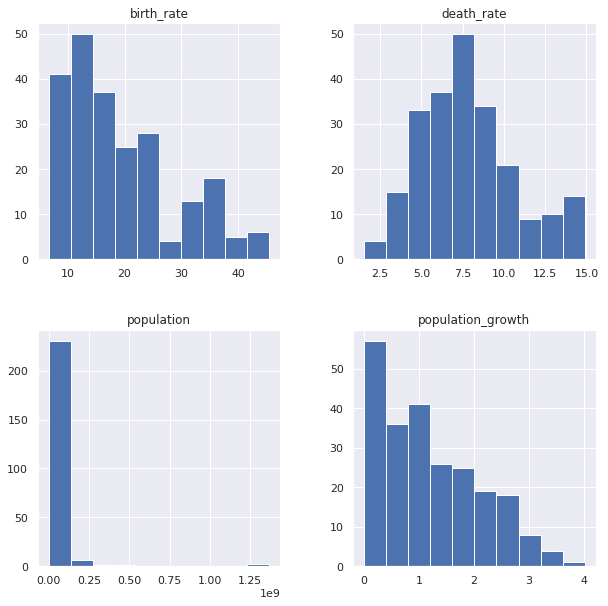

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
#sns.set(color_codes=True)

all_countries.hist(ax=ax)

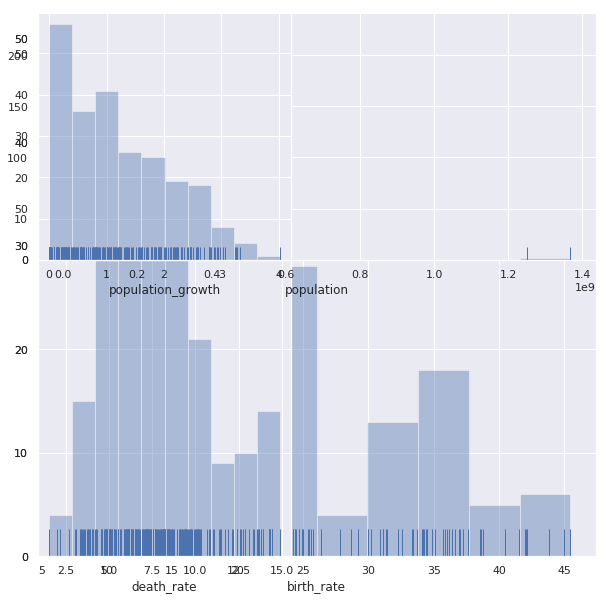

In [95]:
# plotting using seaborn

sns_fig = plt.figure(figsize=(10,10))
sns_ax1 = sns_fig.add_subplot(111)
sns_ax2 = sns_fig.add_subplot(121)
sns_ax3 = sns_fig.add_subplot(211)
sns_ax4 = sns_fig.add_subplot(221)
cols = ["birth_rate", "death_rate", "population", "population_growth"]

sns.distplot(all_countries["birth_rate"].dropna(), bins=10, kde=False, rug=True, ax=sns_ax1)
sns.distplot(all_countries["death_rate"].dropna(), bins=10, kde=False, rug=True, ax=sns_ax2)
sns.distplot(all_countries["population"].dropna(), bins=10, kde=False, rug=True, ax=sns_ax3)
sns.distplot(all_countries["population_growth"].dropna(), bins=10, kde=False, rug=True, ax=sns_ax4)